# **Applying supervised learning to predict student dropout rate**

In this project, I examine student data and use supervised learning techniques to predict whether a student will drop out. In the education sector, retaining students is vital for the institution's financial stability and for students’ academic success and personal development. A high dropout rate can lead to significant revenue loss, diminished institutional reputation, and lower overall student satisfaction.

Approximately **12 hours** for this project.

<br>

## **Business context**
An un-named education provider specialises in providing educational services and resources to students and professionals across various fields. The company's primary focus is on enhancing learning experiences through a range of services. By leveraging cutting-edge technology and a team of experienced educators, they aim to bridge the gap between traditional learning methods and the evolving needs of today's learners.

It works closely with university faculty and staff to ensure that the universities are prepared and equipped to welcome and support a growing international student body enabling a seamless transition into their chosen academic environment.

Its partners with universities with the aim of preparing a pipeline of talented international students from diverse backgrounds for degree study. Aiming to help international students adapt to the academic, cultural, and social aspects of studying abroad. This is achieved by improving conversational and subject-specific language skills and academic readiness before students progress to a full degree programme at university.

Through its comprehensive suite of services, it supports learners and universities at every stage of their educational journey, from high school to postgraduate studies. Its approach is tailored to meet the unique needs of each learner, offering personalised learning paths and flexible scheduling options to accommodate various learning styles and commitments.

Designed to be accessible and affordable, making quality education a reality for many individuals. By focusing on the integration of technology and personalised learning, the company aims to empower learners to achieve their full potential and succeed in their academic and professional pursuits. This education provider is at the forefront of transforming how people learn and grow through its dedication to innovation and excellence.

<br>

## **Objective**
To apply advanced machine learning techniques to create a predictive model for student dropout. This project will involve comprehensive data exploration, preprocessing, and feature engineering to ensure high-quality input for the models. Employing and comparing multiple predictive algorithms - XGBoost and neural network-based model, to determine the most effective model for predicting student dropout.

Including:
- exploring the data set
- preprocessing the data and conduct feature engineering
- predicting dropout using XGBoost and a neural network-based model
- Identifying the most important predictors of dropout.

<br>

## **What this project demonstrates**
- That I can develop accurate predictions across diverse organisational scenarios by building and testing advanced machine learning models
- Am able to inform data-driven decision-making with advanced machine learning algorithms and models
- Can propose and present effective solutions to organisational problems using data preprocessing, model selection, and insightful analysis techniques.

# 1. Importing relevant libraries and load the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [ ]:
from datetime import datetime

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.optimizers import Adam, RMSprop

In [ ]:
!pip install category_encoders
from category_encoders import BinaryEncoder

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.3 MB/s eta 0:00:00


In [ ]:
from sklearn.metrics import (roc_auc_score, accuracy_score,
                              classification_report, precision_score,
                              confusion_matrix, ConfusionMatrixDisplay)

In [ ]:
from tensorflow.keras.optimizers import SGD, SGD as SGD_with_Momentum, RMSprop, Adam, Adamax, Nadam
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
import gdown
destination = '.csv'

# Construct the download URL
download_url = f''

# Download the file using gdown
gdown.download(download_url, destination, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1-9zM5rwmMEoSJowAvgex8XfIqU7C80-G
To: /content/CourseLevelDatasetVersion2.csv
100%|██████████| 9.01M/9.01M [00:00<00:00, 67.6MB/s]


'CourseLevelDatasetVersion2.csv'

In [ ]:
df_raw = pd.read_csv('CourseLevelDatasetVersion2.csv')

In [ ]:
df_raw.head(3)

In [ ]:
print(df_raw.shape)
print(df_raw.info())

looks like nulls present in - DiscountType, HomeCountry, HomeState, HomeCity, NonCompletionReason, TerminationDate, AssessedModules, PassedModules, FailedModules, CreditWeightedAverage, ProgressionDegree, PresentCount, LateCount, AuthorisedAbsenceCount, UnauthorisedAbsenceCount, ContactHours, AttendancePercentage                       

# 2. Data preparation/Data pre-processing & Feature Engineering

droppping irrelevant columns, converting data to the correct dtypes

## 2.1 Dropping columns, nulls and EDA

In [ ]:
# Columns to drop as specified in the project outline

columns_to_drop = ['BookingId','BookingType', 'LeadSource', 'DiscountType',
                   'Nationality', 'HomeCountry', 'HomeState', 'HomeCity',
                   'PresentCount', 'LateCount', 'AuthorisedAbsenceCount',
                   'ArrivedDate','NonCompletionReason', 'TerminationDate',
                   'CourseFirstIntakeDate', 'CourseStartDate','CourseEndDate',
                   'AcademicYear', 'CourseName', 'LearnerCode', 'ProgressionDegree',
                   'EligibleToProgress', 'AssessedModules', 'PassedModules',
                   'FailedModules', 'AttendancePercentage', 'ContactHours']

df = df_raw.drop(columns=columns_to_drop)

In [ ]:
print(df.shape)
print(df.info())

Nulls present in only 2 columns now: CreditWeightedAverage, UnauthorisedAbsenceCount

In [ ]:
print((25059-22763)/25059) # Percentage of nulls in CreditWeightedAverage
print((25059-24851)/25059) # Percentage of nulls in UnauthorisedAbsenceCount

In [ ]:
# dropping nulls
df = df.dropna(subset=['CreditWeightedAverage', 'UnauthorisedAbsenceCount'])
print(df.isnull().any().any())
print(df.info())

In [ ]:
# couldve added

print(df.isnull().sum(), "\n")

print(df.isnull().sum()/len(df))

print("\nUnique value counts: \n", df.nunique())
print("\nNull values: \n", df.isna().sum())

In [ ]:
df.head(3)

df.head(2)

In [ ]:
display(df.head(3))

display(df.head(1))

In [ ]:
df.describe()

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='CompletedCourse', y='CreditWeightedAverage', data=df)
plt.title('Credit Weighted Average by Course Completion Status')
plt.xlabel('Completed Course')
plt.ylabel('Credit Weighted Average')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='CompletedCourse', y='UnauthorisedAbsenceCount', data=df)
plt.title('Unauthorised Absence Count by Course Completion Status')
plt.xlabel('Completed Course')
plt.ylabel('Unauthorised Absence Count')
plt.show()

Looking at the first 2 box plots we can see that those who completed the course had a higher score and also less unauthorised absences. Wheras those who did not had the opposite relationship

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='CreditWeightedAverage', hue='CompletedCourse', data=df)
plt.title('Credit Weighted Average by Gender and Course Completion Status')
plt.xlabel('Gender')
plt.ylabel('Credit Weighted Average')
plt.legend(title='Completed Course')
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='UnauthorisedAbsenceCount', hue='CompletedCourse', data=df)
plt.title('Unauthorised Absence Count by Gender and Course Completion Status')
plt.xlabel('Gender')
plt.ylabel('Unauthorised Absence Count')
plt.legend(title='Completed Course')
plt.show()

No relationship between M/F scores and absences

In [ ]:
# View distributions of numerical features
df.hist(figsize=(10,4))
plt.show()

## Categorical features

In [ ]:
# View plots of categorical variables coloured by completedcourse
categorical_columns_1 = ['CentreName', 'ProgressionUniversity']

# Create figure
fig, axes = plt.subplots(nrows=len(categorical_columns_1), figsize=(15, 15))

# Plot each categorical column coloured by 'CompletedCourse'
for i, col in enumerate(categorical_columns_1):
    sns.countplot(x=col, hue='CompletedCourse', data=df, ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='CompletedCourse', loc='upper right')
    axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


categorical_columns_2 = ['Gender', 'CourseLevel', 'IsFirstIntake']
fig, axes = plt.subplots(nrows=len(categorical_columns_2), figsize=(8, 8))

# Plot each categorical column coloured by 'CompletedCourse'
for i, col in enumerate(categorical_columns_2):
    sns.countplot(x=col, hue='CompletedCourse', data=df, ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='CompletedCourse', loc='upper right')

plt.tight_layout()
plt.show()


## 2.2 Convert target column via binary encoding

This is because the target is mutually exclusive and there is no preferred order, classification probelm so true/false / 0/1

In [ ]:
"""

df[CompletedCourseBinary] = df['CompletedCourse'].apply(lambda x: 1 if x == 'Yes' else 0)

"""

"\n\ndf[CompletedCourseBinary] = df['CompletedCourse'].apply(lambda x: 1 if x == 'Yes' else 0)\n\n"

In [ ]:
encoder = BinaryEncoder(cols=['CompletedCourse']) # better for productionisation compared to where df[] python usage
df_target_encoded = encoder.fit_transform(df)
df_target_encoded.head(2)

# 1 = YES = they did in fact complete the course i.e true
# 0 = no = they did not in face complete the course i.e false
# np.where( df["col"] == "Yes", 1, 0)

In [ ]:
# drop extra column so one column for target
df_target_encoded = df_target_encoded.drop(columns=['CompletedCourse_1'])

In [ ]:
#df_target_encoded = pd.get_dummies(df, columns=['CompletedCourse'])

In [ ]:
df_target_encoded.head(2)

## 2.3 One hot encode catgeorical columns

Nominal Data that is mutually exclusive but there is no preferred order

In [ ]:
# Select columns that I want to onehot encode
columns_to_ohe = ['CentreName', 'Gender', 'CourseLevel', 'IsFirstIntake', 'ProgressionUniversity']

# One-hot encode the selected columns
df_ohe = pd.get_dummies(df_target_encoded, columns=columns_to_ohe)

In [ ]:
df_ohe.head(2)

## 2.4 Convert DateofBirth to age

In [ ]:
df_encoded = df_ohe.copy()

In [ ]:
df_encoded.head(2)

In [ ]:
# Function to calculate age
def calculate_age(born):
    today = datetime.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

# Convert 'DateofBirth' column to datetime
df_encoded['DateofBirth'] = pd.to_datetime(df_encoded['DateofBirth'], format='%d/%m/%Y')

# Apply the function to calculate age
df_encoded['Age'] = df_encoded['DateofBirth'].apply(calculate_age)

In [ ]:
df_encoded = df_encoded.drop(columns=['DateofBirth'])

In [ ]:
df_encoded.head(2)

## 2.5 Scaling of numerical data + train test split

First lets split my target and feature columns to avoid data leakage as will need to scale the data

Apply 80-20 split

In [ ]:
X = df_encoded.drop(columns=['CompletedCourse_0'])
y = df_encoded['CompletedCourse_0']

In [ ]:
# First split: into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: into training and validation sets
#X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.1, random_state=42)

Using Standardisation rather than normalisation because I will be using XGboost which is a gradient based optimisation method which is sensitive to the scale of the data! - same for decision trees and RFs

In [ ]:
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#X_val = scaler.transform(X_val)

In [ ]:
X_train

In [ ]:
y

In [ ]:
y.value_counts()

In [ ]:
print((y.value_counts() / y.value_counts().sum()) * 100)

In [ ]:
print((y.value_counts(normalize = True)) * 100)

The data is indeed imbalanced

In [ ]:
df_encoded.head(2)

## 2.6 Redo feature engineering so I have a separate data set with extra features

In [ ]:
# Columns to drop as specified in the rubric

columns_to_drop = ['BookingId','BookingType', 'LeadSource', 'DiscountType',
                   'Nationality', 'HomeCountry', 'HomeState', 'HomeCity',
                   'PresentCount', 'LateCount', 'AuthorisedAbsenceCount',
                   'ArrivedDate','NonCompletionReason', 'TerminationDate',
                   'CourseFirstIntakeDate', 'CourseStartDate','CourseEndDate',
                   'AcademicYear', 'CourseName', 'LearnerCode', 'ProgressionDegree',
                   'EligibleToProgress', 'AssessedModules', 'PassedModules',
                   'FailedModules']

df_additional_features = df_raw.drop(columns=columns_to_drop)

In [ ]:
df_additional_features[['ContactHours', 'AttendancePercentage']].head(5)

In [ ]:
print(df_additional_features.shape)
print(df_additional_features.info())
print(df_additional_features.isnull().any().any())

In [ ]:
# Set the aesthetic style of the plots
sns.set(style="white")

# Create a figure and axes to plot on
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for ContactHours
sns.boxplot(x='CompletedCourse', y='ContactHours', data=df_additional_features, ax=axes[0])
axes[0].set_title('Contact Hours by Course Completion')
axes[0].set_xlabel('Completed Course')
axes[0].set_ylabel('Contact Hours')

# Plot for AttendancePercentage
sns.boxplot(x='CompletedCourse', y='AttendancePercentage', data=df_additional_features, ax=axes[1])
axes[1].set_title('Attendance Percentage by Course Completion')
axes[1].set_xlabel('Completed Course')
axes[1].set_ylabel('Attendance Percentage')

# Adjust the layout to make room for the titles and labels
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Nulls present in, CreditWeightedAverage, UnauthorisedAbsenceCount, ContactHours, AttendancePercentage

In [ ]:
# dropping nulls
df_additional_features = df_additional_features.dropna(subset=['CreditWeightedAverage', 'UnauthorisedAbsenceCount', 'ContactHours', 'AttendancePercentage'])
print(df_additional_features.shape)
print(df_additional_features.info())
print(df_additional_features.isnull().any().any())

In [ ]:
encoder = BinaryEncoder(cols=['CompletedCourse'])
df_target_encoded = encoder.fit_transform(df_additional_features)
# drop extra column so one column for target
df_target_encoded = df_target_encoded.drop(columns=['CompletedCourse_1'])
# Select columns that I want to onehot encode
columns_to_ohe = ['CentreName', 'Gender', 'CourseLevel', 'IsFirstIntake', 'ProgressionUniversity']

# One-hot encode the selected columns
df_ohe = pd.get_dummies(df_target_encoded, columns=columns_to_ohe)
df_encoded = df_ohe.copy()

# Function to calculate age
def calculate_age(born):
    today = datetime.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

# Convert 'DateofBirth' column to datetime
df_encoded['DateofBirth'] = pd.to_datetime(df_encoded['DateofBirth'], format='%d/%m/%Y')

# Apply the function to calculate age
df_encoded['Age'] = df_encoded['DateofBirth'].apply(calculate_age)

df_encoded = df_encoded.drop(columns=['DateofBirth'])

X_additional_features = df_encoded.drop(columns=['CompletedCourse_0'])
y = df_encoded['CompletedCourse_0']

X_train_additional_features, X_test_additional_features, y_train, y_test = train_test_split(X_additional_features, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_additional_features = scaler.fit_transform(X_train_additional_features)
X_test_additional_features = scaler.transform(X_test_additional_features)

In [ ]:
data_for_coeff_matrix = df_target_encoded[['IsFirstIntake', 'CreditWeightedAverage', 'UnauthorisedAbsenceCount', 'CompletedCourse_0', 'ContactHours', 'AttendancePercentage']]

# Calculate the Spearman correlation matrix
corr_matrix_spearman = data_for_coeff_matrix.corr(method='spearman')

# Visualize the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_spearman,
            annot=True,
            cmap='coolwarm',
            linewidths=0.5,
            annot_kws={"fontsize": 16, "fontweight": "bold"})

plt.title('Spearman Correlation')
plt.show()

# Note couldve added age here too but wouldve required some configuration of the dataframe as dont want OHE columns in here,
# next time do OHE as a final step as it explodes features, corr coeff matrix not required in rubric so not done for data without 2 features or age added as heavy discussion not required, interesting to look at however
# credt>attendance>absence>contact hrs

# 2. XGBoost models





## 2.1 XGBoost model (without tuning)

- Binary Classification:

Initialize XGBoost classifier

default values is as below, no need to explicitly specify in this instance excpet for eval metric which I want to be constant

model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')


In [ ]:
# F1 evaluation function
def f1_eval(y_pred, dtrain):
    y_true = dtrain.get_label()
    err = 1-f1_score(y_true, np.round(y_pred))
    return 'f1_err', err

In [ ]:
xgb_model = xgb.XGBClassifier(eval_metric=f1_eval)
xgb_model.fit(X_train, y_train)

# Model Evaluation - classification report
predictions = xgb_model.predict(X_test)

print(f"XGB model Accuracy: {accuracy_score(y_test, predictions)}")
print(classification_report(y_test, predictions))

cm = confusion_matrix(y_test, predictions)

# Calculate the AUC score - note that ROC not requested nor plot, can do later if have time, bit easier to understand with a plot for me

y_proba = xgb_model.predict_proba(X_test)[:, 1]

auc_score = roc_auc_score(y_test,y_proba)

print(f" AUC score {auc_score}")

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt ='d', cmap= 'Blues')
plt.title('Confusion matrix for classification - XGBoost model without tuning')
plt.xlabel('Predicted labels by model')
plt.ylabel('True labels / Observed / Reality')
plt.show()

# cfmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model.classes_)
# cfmd.plot()
# plt.show()

For an imbalanced data set, accuracy is not particularly useful. F1 score is more valuable as it balances both precision and recall, along with AUC score to compare models.

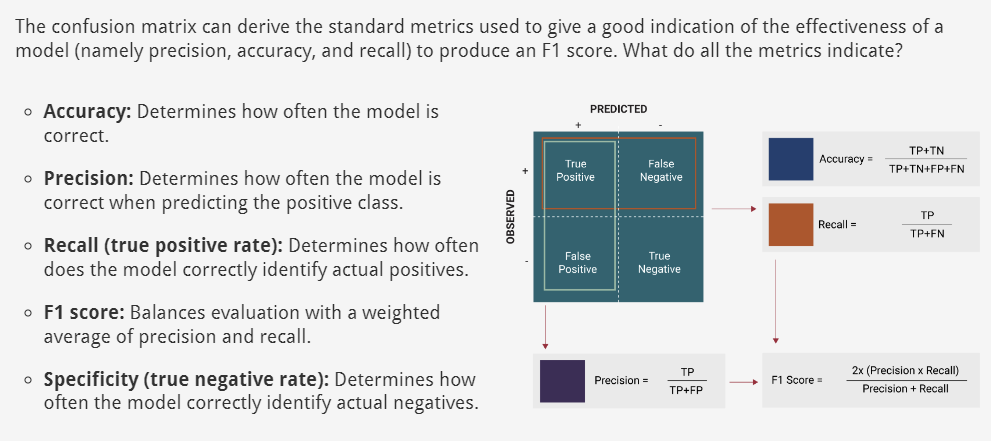

TP (True Positive): The number of positive samples correctly predicted as positive.

TN (True Negative): The number of negative samples correctly predicted as negative.

FP (False Positive): The number of negative samples incorrectly predicted as positive.

FN (False Negative): The number of positive samples incorrectly predicted as negative.

----

Precision is a measure of how many of the positive predictions made by the model are actually positive.


High Precision: Indicates that when the model predicts a positive class, it is usually correct.

Use Case: Important in scenarios where false positives are costly or undesirable - in this business case its preferable to have a false negative - where a student is incorrectly predicted as going to drop out but is not likely to over a case where a student is predicted of not dropping out but in fact does end up dropping out i.e a false positive - i.e false positives are costly here so we do not want to have many false positives. Therefore we prefer to have a high precision

Recall measures how many of the actual positive cases were correctly identified by the model.

High Recall: Indicates that the model is good at identifying positive cases.

Use Case: Crucial when missing a positive case is costly. Here again we prefer to have a high recall.

Note that there is a recall/precision tradeoff

----

## 2.2 XGBoost model tuning with and without extra features

Setting the hyperparams to serach through

In [ ]:
# Define the parameter grid
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3, 0.5],
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7]
}

## 2.2 XGBoost model (with tuning)

tuning for learning rate, max depth, number of estimators

In [ ]:
# Setup the grid search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=None, scoring='roc_auc', verbose=1) # cross validation set to 0 for fair comparison with ANN which I did not use any cross validation for as slightly trickier to implement, so opted for a for loop

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best AUC score: {grid_search.best_score_}")

# Evaluate on test data
best_model = grid_search.best_estimator_
y_proba = best_model.predict_proba(X_test)[:, 1]

In [ ]:
best_params = grid_search.best_params_

In [ ]:
xgb_model = xgb.XGBClassifier(**best_params)
xgb_model.fit(X_train, y_train)

# Model Evaluation - classification report
predictions = xgb_model.predict(X_test)
print(f"XGB model Accuracy: {accuracy_score(y_test, predictions)}")
print(classification_report(y_test, predictions))

cm = confusion_matrix(y_test, predictions)

# Calculate the AUC score - note that ROC not requested nor plot, can do later if have time, bit easier to understand with a plot for me

y_proba = xgb_model.predict_proba(X_test)[:, 1]

auc_score = roc_auc_score(y_test,y_proba)

print(f" AUC score for XGBoost model with hyperparameters tuned via grid search {auc_score}")

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt ='d', cmap= 'Blues')
plt.title('Confusion matrix for classification - XGBoost model with tuning')
plt.xlabel('Predicted labels by model')
plt.ylabel('True labels / Observed / Reality')
plt.show()

## 2.3 XGBoost model with additional columns - 'ContactHours', 'AttendancePercentage



### Run the model

In [ ]:
# Setup the grid search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=None, scoring='roc_auc', verbose=2)

# Perform the grid search
grid_search.fit(X_train_additional_features, y_train)

# Get the best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best AUC score: {grid_search.best_score_}")

# Evaluate on test data
best_model = grid_search.best_estimator_
y_proba = best_model.predict_proba(X_test_additional_features)[:, 1]

In [ ]:
best_params = grid_search.best_params_

In [ ]:
xgb_model = xgb.XGBClassifier(**best_params)
xgb_model.fit(X_train_additional_features, y_train)

# Model Evaluation - classification report
predictions = xgb_model.predict(X_test_additional_features)
print(f"XGB model Accuracy: {accuracy_score(y_test, predictions)}")
print(classification_report(y_test, predictions))

cm = confusion_matrix(y_test, predictions)

# Calculate the AUC score - note that ROC not requested nor plot, can do later if have time, bit easier to understand with a plot for me
auc_score = roc_auc_score(y_test,y_proba)
print(f" AUC score for XGBoost model with hyperparameters tuned via grid search {auc_score}")

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt ='d', cmap= 'Blues')
plt.title('Confusion matrix for classification - XGBoost model with tuning and extra features')
plt.xlabel('Predicted labels by model')
plt.ylabel('True labels / Observed / Reality')
plt.show()

The model with additional features has the highest model accuracy and highest AUC score.

Come back to this interpretation later

A benefit is the precision and recall for predicting (our postive class - where students completed the course) 1 has improved significantly where we have added more features with only a slight decrease in the precision of 0.

The impact of our recall increasing from 076/0.73 to 0.83 means that for our positive class observations - we are able to capture more of them, i.e our model now correctly identifies more positive cases i.e successes so we are less likely to flag a student to fail when in fact they are going to pass. This is shown by our TN rate going up (bottom RHS).

Our FPs top right has gone up - The number of negative samples incorrectly predicted as 0 . - i.e where a student is going to fail but has been incorrectly been predicted to pass - this is not ideal actually as not completing the course is costly.

TP top left - The number of positive samples correctly predicted as positive. i.e our model correctly predicting a student to pass has gone up, this is good
The number of positive samples correctly predicted as positive.

FN bottom lhs - The number of positive samples incorrectly predicted as negative.


### 2.4 Features importance

In [ ]:
X_train_additional_features = pd.DataFrame(X_train_additional_features, columns=X_additional_features.columns)

In [ ]:
# Get feature importances
feature_importances = pd.Series(xgb_model.feature_importances_, index=X_train_additional_features.columns).sort_values()

# Plot all feature importances
fig, ax = plt.subplots() # add figsize=(8, 16) inside bracket if want to see all the names
feature_importances.plot.barh(ax=ax)
ax.grid(False)
ax.set_title('Feature Importances')
plt.show()

# Plot the last 10 feature importances
fig, ax = plt.subplots()
feature_importances.iloc[-10:].plot.barh(ax=ax)
ax.grid(True)
ax.set_title('Top 10 Features')  # Adding title to the second plot
plt.show()

AttendancePercentage is ranked 7th in feature importance while contact hours is 12th (2 extra features)

In [ ]:
"""
Couldnt get this to work

# Get feature importances and sort them
feature_importances = pd.Series(xgb_model.feature_importances_, index=X_train_additional_features.columns).sort_values()

# Define the features you are interested in
features_of_interest = ['ContactHours', 'AttendancePercentage']

# Find the rank of each feature
for feature in features_of_interest:
    if feature in feature_importances.index:
        rank = feature_importances.index.get_loc(feature) + 1  # +1 for 1-based rank
        print(f"The rank of {feature} in terms of feature importance is: {rank}")
    else:
        print(f"{feature} not found in feature importances.")
"""

# 3. ANN models

## 3.1 ANN model without tuning

In [ ]:
def create_ANN_model(X_train, n_neurons, optimizer, activation, n_hidden_layers):
    # Input shape for my input layer
    input_shape = X_train.shape[1:]
    print(f"Number of neurons for the input layer as a result of the shape of the object fed in is : {input_shape}")  # This should be 70 or 72 depending on if I added extra features
    print(f"The optimizer selected is : {optimizer}")

    # Define the input layer
    input_layer = tf.keras.layers.Input(shape=input_shape)

    # Define the hidden layer with the specified number of neurons and activation function
    hidden = tf.keras.layers.Dense(n_neurons, activation=activation)(input_layer)

    # Add additional hidden layers as specified
    for _ in range(n_hidden_layers - 1):
        hidden = tf.keras.layers.Dense(n_neurons, activation=activation)(hidden)

    # Define the output layer with sigmoid activation for binary classification
    output_layer = tf.keras.layers.Dense(1, activation="sigmoid")(hidden)

    # Specify the model, saying which are the inputs and which are the outputs of the Functional Model.
    model = tf.keras.Model(inputs=[input_layer], outputs=[output_layer])

    # Compile the model with the specified optimizer
    model.compile(
        optimizer=optimizer,
        loss="binary_crossentropy",
        metrics=['accuracy'] # I could change this to recall, precision etc but dont think it really matters as will be using confusion matrix
    )

    return model

In [ ]:
epochs = 15
batch_size = 32
n_neurons = 140
optimizer = 'adam'
activation = 'relu'
n_hidden_layers = 3

# Create and train the model
ANN_model_unoptimised = create_ANN_model(X_train, n_neurons, optimizer, activation, n_hidden_layers)
ANN_model_unoptimised_history = ANN_model_unoptimised.fit(X_train, y_train, validation_split=0.2, verbose=1, epochs=epochs, batch_size=batch_size)

loss, accuracy = ANN_model_unoptimised.evaluate(X_test, y_test, verbose=1)
print(f"Loss: {loss}, Accuracy: {accuracy}")

In [ ]:
# Initialize lists for storing results and histories
ANN_model_unoptimised_results = []
ANN_model_unoptimised_histories = []

# Append results
ANN_model_unoptimised_results.append({
    'neurons': n_neurons,
    'optimizer': optimizer,
    'activation': activation,
    'loss': loss,
    'accuracy': accuracy
})

# Store history for plotting
ANN_model_unoptimised_histories.append({
    'neurons': n_neurons,
    'activation': activation,
    'optimizer': optimizer,
    'loss': ANN_model_unoptimised_history.history['loss'],
    'val_loss': ANN_model_unoptimised_history.history['val_loss'],
    'accuracy': ANN_model_unoptimised_history.history['accuracy'],
    'val_accuracy': ANN_model_unoptimised_history.history['val_accuracy']
})

In [ ]:
# Only one entry in the list
history = ANN_model_unoptimised_histories[0]
history

In [ ]:
# Create a figure and set of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plotting losses
epochs_range = range(1, len(history['loss']) + 1)
ax1.plot(epochs_range, history['loss'], label=f'{history["optimizer"]} - {history["neurons"]} neurons - {history["activation"]} - Train', linestyle='-')
ax1.plot(epochs_range, history['val_loss'], label=f'{history["optimizer"]} - {history["neurons"]} neurons - {history["activation"]} - Validation', linestyle='--')

ax1.set_title('ANN - Loss comparison without tuning hyperparameters')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend(loc='best')
ax1.grid(True)

# Plotting accuracies
epochs_range = range(1, len(history['accuracy']) + 1)
ax2.plot(epochs_range, history['accuracy'], label=f'{history["optimizer"]} - {history["neurons"]} neurons - {history["activation"]} - Train', linestyle='-')
ax2.plot(epochs_range, history['val_accuracy'], label=f'{history["optimizer"]} - {history["neurons"]} neurons - {history["activation"]} - Validation', linestyle='--')

ax2.set_title('ANN - Accuracy comparison without tuning hyperparameters')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='best')
ax2.grid(True)

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

In [ ]:
# Plotting losses
plt.figure(figsize=(12, 6))
epochs_range = range(1, len(history['loss']) + 1)
plt.plot(epochs_range, history['loss'], label=f'{history["optimizer"]} - {history["neurons"]} neurons - {history["activation"]} - Train', linestyle='-')
plt.plot(epochs_range, history['val_loss'], label=f'{history["optimizer"]} - {history["neurons"]} neurons - {history["activation"]} - Validation', linestyle='--')

plt.title('ANN - Loss comparison without tuning hyperparameters')
plt.xlabel('Epochs')
plt.ylabel('Loss')
# Move the legend outside the plot
plt.legend(loc='right', bbox_to_anchor=(1.3, 0.5))
plt.grid(True)
plt.show()

In [ ]:
# Plotting accuracys
plt.figure(figsize=(12, 6))
epochs_range = range(1, len(history['accuracy']) + 1)
plt.plot(epochs_range, history['accuracy'], label=f'{history["optimizer"]} - {history["neurons"]} neurons - {history["activation"]} - Train', linestyle='-')
plt.plot(epochs_range, history['val_accuracy'], label=f'{history["optimizer"]} - {history["neurons"]} neurons - {history["activation"]} - Validation', linestyle='--')

plt.title('ANN - Accuracy comparison without tuning hyperparameters')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
# Move the legend outside the plot
plt.legend(loc='right', bbox_to_anchor=(1.3, 0.5))
plt.grid(True)
plt.show()

In [ ]:
# Model Evaluation - classification report
predictions = (ANN_model_unoptimised.predict(X_test) > 0.5).astype(int) # note that this is the threshold, default of 0.5 being used - how could I adjust this to change precision, recall etc
print(f"ANN_model_unoptimised accuracy: {accuracy_score(y_test, predictions)}")
print(classification_report(y_test, predictions))

cm = confusion_matrix(y_test, predictions)

# Calculate the AUC score - note that ROC not requested nor plot, can do later if have time, bit easier to understand with a plot for me

y_proba_ANN_unoptimised = ANN_model_unoptimised.predict(X_test).ravel()

auc_score_ANN_unoptimised = roc_auc_score(y_test,y_proba_ANN_unoptimised)

print(f" AUC score ANN unoptimised {auc_score_ANN_unoptimised}")

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt ='d', cmap= 'Blues')
plt.title('ANN - Confusion matrix for classification without tuning')
plt.xlabel('Predicted labels by model')
plt.ylabel('True labels / Observed / Reality')
plt.show()

## 3.2 Tuning ANN with and without extra features

Set the range of hyper parameters to be the same across the 2 models, with only the data being fed in (extra features or not changing)

In [ ]:
# Define hyperparameters correctly
n_neurons = [72, 140, 280, 560]                      # apparently this is between 10-100 usually
optimizers = ['adam', 'rmsprop', 'sgd']
activations = ['relu', 'sigmoid', 'softmax', 'tanh'] # I would expect ReLU to be optimum, note that this activation is defining only the hidden layer activation, rather than the output layer as that is static at Sigmoid for a binary classification that is standard
batch_size = 32
epochs = 15
n_hidden_layers = 3                                  # apparently between 1-5 depending on problems complexity see section 2.3.5 of lecture notes, though Giovanna in a lecture said never go below 3, 3 feels like a good middle ground so im happy with that

In [ ]:
"""
optimizers = [
    SGD(learning_rate=0.01),                      # Basic SGD with a default learning rate
    SGD(learning_rate=0.01, momentum=0.9),        # SGD with Momentum
    RMSprop(learning_rate=0.001),                 # RMSprop for adaptive learning rate and stability
    Adam(learning_rate=0.001),                    # Adam for adaptive learning rates and good performance across tasks
    Adamax(learning_rate=0.002),                  # Adamax for potentially better stability
    Nadam(learning_rate=0.001)                    # Nadam for combining Adam and Nesterov momentum
]
"""

## 3.2 ANN modle tuned - Optimising for number of neurons, optimisers and activations functions

want to focus on metrics that accurately reflect how well your model identifies this negative class of 0.

Precision would then be the accuracy of predicting dropouts.

Recall would measure your model’s ability to find all potential dropouts.
Given your goal, you might prioritize Recall to ensure you identify as many potential dropouts as possible, even if it means tolerating some false alarms (students predicted to drop out who don’t).

The F1 Score could also be useful as it balances Precision and Recall, which might help if you also want to maintain a certain level of precision in your predictions.

In [ ]:
ANN_model_optimised_results = []
best_result_ANN_optimised = None # shouldnt need this

target_class = 0  # Specify the class you want to optimize for (0 or 1) - recall  (haha) that 0 is dropout and 1 is completing the course, so my model is predicting for 0s rather than 1s which I guess is more common...
# in future just make sure data reflects convention rather than changing metric, otherwise its confusing

# Create a for loop for each hyperparameter
for neurons in n_neurons:
    for activation in activations:
        for optimizer in optimizers:
          print(f"\nTraining with {neurons} neurons, optimizer: {optimizer}, activation: {activation}, batch size: {batch_size}, epochs: {epochs}")

          # Create the model with current hyperparameters
          ANN_model_optimised = create_ANN_model(X_train, neurons, optimizer, activation, n_hidden_layers=n_hidden_layers)

          # Train the model
          ANN_model_optimised_history = ANN_model_optimised.fit(X_train, y_train, validation_split=0.2, verbose=1, epochs=epochs, batch_size=batch_size)

          # Evaluate the model
          loss, accuracy = ANN_model_optimised.evaluate(X_test, y_test, verbose=1)

          # Predict with the model
          y_pred = (ANN_model_optimised.predict(X_test) > 0.5).astype(int)
          # Calculate additional metrics
          precision = precision_score(y_test, y_pred, pos_label=target_class, zero_division=0)
          recall = recall_score(y_test, y_pred, pos_label=target_class)
          f1 = f1_score(y_test, y_pred, pos_label=target_class)

          # Append results
          ANN_model_optimised_results.append({
              'neurons': neurons,
              #'epoch': epoch,
              #'batch_size': batch_size,
              'optimizer': optimizer,
              'activation': activation,
              'loss': loss,
              'accuracy': accuracy,
              'precision': precision,
              'recall': recall,
              'f1_score': f1,
              'predictions': y_pred,
              'loss_history': ANN_model_optimised_history.history['loss'],
              'val_loss_history': ANN_model_optimised_history.history['val_loss'],
              'accuracy_history': ANN_model_optimised_history.history['accuracy'],
              'val_accuracy_history': ANN_model_optimised_history.history['val_accuracy']
              })

In [ ]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))  # 1 row, 2 columns

# Plotting losses on the first subplot
for result in ANN_model_optimised_results:
    epochs_range = range(1, len(result['loss_history']) + 1)
    ax1.plot(epochs_range, result['loss_history'], label=f'{result["optimizer"]} - {result["neurons"]} neurons - {result["activation"]} - Train Loss', linestyle='-')
    ax1.plot(epochs_range, result['val_loss_history'], label=f'{result["optimizer"]} - {result["neurons"]} neurons - {result["activation"]} - Validation Loss', linestyle='--')

ax1.set_title('ANN - Loss Comparison During Tuning')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
ax1.grid(True)

# Plotting accuracies on the second subplot
for result in ANN_model_optimised_results:
    epochs_range = range(1, len(result['accuracy_history']) + 1)
    ax2.plot(epochs_range, result['accuracy_history'], label=f'{result["optimizer"]} - {result["neurons"]} neurons - {result["activation"]} - Train Accuracy', linestyle='-')
    ax2.plot(epochs_range, result['val_accuracy_history'], label=f'{result["optimizer"]} - {result["neurons"]} neurons - {result["activation"]} - Validation Accuracy', linestyle='--')

ax2.set_title('ANN - Accuracy Comparison During Tuning')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
ax2.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plots
plt.show()

In [ ]:
# Set the metric to optimize for (can be 'accuracy', 'precision', 'recall', or 'f1_score')
metric_to_optimise_for = 'f1_score'

# Initialize variables to track the best result
best_metric_value = -1
best_result_index = -1

# Iterate over the results
for index, result in enumerate(ANN_model_optimised_results):
    # Get the current metric value
    current_metric_value = result[metric_to_optimise_for]

    # Check if the current metric value is the best so far
    if current_metric_value > best_metric_value:
        best_metric_value = current_metric_value
        best_result_index = index

# Get the best result based on the best index
best_result_ANN_optimised = ANN_model_optimised_results[best_result_index]

# Print the best result (optional)
print(f"Best result based on {metric_to_optimise_for}:")
print(best_result_ANN_optimised)

In [ ]:
best_result_ANN_optimised

In [ ]:
# Retrieve best parameters
best_neurons = best_result_ANN_optimised['neurons']
best_optimizer = best_result_ANN_optimised['optimizer']
best_activation = best_result_ANN_optimised['activation']
best_predictions = best_result_ANN_optimised['predictions']

print(best_neurons)
print(best_optimizer)
print(best_activation)

In [ ]:
# Access history from best_result_ANN_optimised
history = best_result_ANN_optimised['loss_history']  # Training loss history
val_history = best_result_ANN_optimised['val_loss_history']  # Validation loss history
train_accuracy = best_result_ANN_optimised['accuracy_history']  # Training accuracy history
val_accuracy = best_result_ANN_optimised['val_accuracy_history']  # Validation accuracy history

# Construct plot labels
train_loss_label = f'{best_result_ANN_optimised["optimizer"]} - {best_result_ANN_optimised["neurons"]} neurons - {best_result_ANN_optimised["activation"]} - Train Loss'
val_loss_label = f'{best_result_ANN_optimised["optimizer"]} - {best_result_ANN_optimised["neurons"]} neurons - {best_result_ANN_optimised["activation"]} - Validation Loss'
train_accuracy_label = f'{best_result_ANN_optimised["optimizer"]} - {best_result_ANN_optimised["neurons"]} neurons - {best_result_ANN_optimised["activation"]} - Train Accuracy'
val_accuracy_label = f'{best_result_ANN_optimised["optimizer"]} - {best_result_ANN_optimised["neurons"]} neurons - {best_result_ANN_optimised["activation"]} - Validation Accuracy'

# Create a figure and set of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plotting losses
epochs_range = range(1, len(history) + 1)
ax1.plot(epochs_range, history, label=train_loss_label, linestyle='-')
ax1.plot(epochs_range, val_history, label=val_loss_label, linestyle='--')

ax1.set_title('ANN - Loss Comparison for the Best Hyperparameter Settings without Extra Features')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend(loc='best')
ax1.grid(True)

# Plotting accuracies
epochs_range = range(1, len(train_accuracy) + 1)
ax2.plot(epochs_range, train_accuracy, label=train_accuracy_label, linestyle='-')
ax2.plot(epochs_range, val_accuracy, label=val_accuracy_label, linestyle='--')

ax2.set_title('ANN - Accuracy Comparison for the Best Hyperparameter Settings without Extra Features')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='best')
ax2.grid(True)

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

In [ ]:
# Model Evaluation - classification report
print(f"ANN_model_optimised accuracy: {accuracy_score(y_test, best_predictions)}")
print(classification_report(y_test, best_predictions))

cm = confusion_matrix(y_test, best_predictions)

# Calculate the AUC score - note that ROC not requested nor plot, can do later if have time, bit easier to understand with a plot for me
# y_proba_ANN_optimised = best_ANN_optimised.predict(X_test_additional_features).ravel()

auc_score_ANN_optimised = roc_auc_score(y_test, best_predictions)

print(f" AUC score ANN optimised {auc_score_ANN_optimised}")

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt ='d', cmap= 'Blues')
plt.title('ANN - Confusion matrix for classification after tuning without extra features')
plt.xlabel('Predicted labels by model')
plt.ylabel('True labels / Observed / Reality')
plt.show()

## Saving model

come back to this

In [ ]:
# Define the file path for saving the model
test_ANN_optimised_save_path = 'ANN_optimised.h5'

# Save the entire model (architecture, weights, and training configuration)
ANN_model_optimised.save(test_ANN_optimised_save_path)

print(f"Model saved to {test_ANN_optimised_save_path}")

# To load the model later:
test_loaded_model = tf.keras.models.load_model(test_ANN_optimised_save_path)
print("Model loaded successfully")

# Evaluate the loaded model
loss, accuracy = test_loaded_model.evaluate(X_test, y_test)
print(f"Loaded model - Test accuracy: {accuracy}")

# Can I do something with this?

In [ ]:
test_loaded_model

test_predictions = (test_loaded_model.predict(X_test) > 0.5).astype(int)

## 3.3 ANN tuned with additional features

### Adding the features back in with relevant feature engineering

In [ ]:
X_train_additional_features
X_test_additional_features

### Run the model

In [ ]:
ANN_model_optimised_results = []
best_result_ANN_optimised = None # shouldnt need this

target_class = 0  # Specify the class you want to optimize for (0 or 1) - recall  (haha) that 0 is dropout and 1 is completing the course, so my model is predicting for 0s rather than 1s which I guess is more common...
# in future just make sure data reflects convention rather than changing metric, otherwise its confusing

# Create a for loop for each hyperparameter
for neurons in n_neurons:
    for activation in activations:
        for optimizer in optimizers:
          print(f"\nTraining with {neurons} neurons, optimizer: {optimizer}, activation: {activation}, batch size: {batch_size}, epochs: {epochs}")

          # Create the model with current hyperparameters
          ANN_model_optimised = create_ANN_model(X_train_additional_features, neurons, optimizer, activation, n_hidden_layers=n_hidden_layers)

          # Train the model
          ANN_model_optimised_history = ANN_model_optimised.fit(X_train_additional_features, y_train, validation_split=0.2, verbose=1, epochs=epochs, batch_size=batch_size)

          # Evaluate the model
          loss, accuracy = ANN_model_optimised.evaluate(X_test_additional_features, y_test, verbose=1)

          # Predict with the model
          y_pred = (ANN_model_optimised.predict(X_test_additional_features) > 0.5).astype(int)
          # Calculate additional metrics
          precision = precision_score(y_test, y_pred, pos_label=target_class, zero_division=0)
          recall = recall_score(y_test, y_pred, pos_label=target_class)
          f1 = f1_score(y_test, y_pred, pos_label=target_class)

          # Append results
          ANN_model_optimised_results.append({
              'neurons': neurons,
              #'epoch': epoch,
              #'batch_size': batch_size,
              'optimizer': optimizer,
              'activation': activation,
              'loss': loss,
              'accuracy': accuracy,
              'precision': precision,
              'recall': recall,
              'f1_score': f1,
              'predictions': y_pred,
              'loss_history': ANN_model_optimised_history.history['loss'],
              'val_loss_history': ANN_model_optimised_history.history['val_loss'],
              'accuracy_history': ANN_model_optimised_history.history['accuracy'],
              'val_accuracy_history': ANN_model_optimised_history.history['val_accuracy']
              })

In [ ]:
# Set the metric to optimize for (can be 'accuracy', 'precision', 'recall', or 'f1_score')
metric_to_optimise_for = 'f1_score'

# Initialize variables to track the best result
best_metric_value = -1
best_result_index = -1

# Iterate over the results
for index, result in enumerate(ANN_model_optimised_results):
    # Get the current metric value
    current_metric_value = result[metric_to_optimise_for]

    # Check if the current metric value is the best so far
    if current_metric_value > best_metric_value:
        best_metric_value = current_metric_value
        best_result_index = index

# Get the best result based on the best index
best_result_ANN_optimised = ANN_model_optimised_results[best_result_index]

# Print the best result (optional)
print(f"Best result based on {metric_to_optimise_for}:")
print(best_result_ANN_optimised)

In [ ]:
best_result_ANN_optimised

In [ ]:
# Retrieve best parameters
best_neurons = best_result_ANN_optimised['neurons']
best_optimizer = best_result_ANN_optimised['optimizer']
best_activation = best_result_ANN_optimised['activation']
best_predictions = best_result_ANN_optimised['predictions']

print(best_neurons)
print(best_optimizer)
print(best_activation)

In [ ]:
# Access history from best_result_ANN_optimised
history = best_result_ANN_optimised['loss_history']  # Training loss history
val_history = best_result_ANN_optimised['val_loss_history']  # Validation loss history
train_accuracy = best_result_ANN_optimised['accuracy_history']  # Training accuracy history
val_accuracy = best_result_ANN_optimised['val_accuracy_history']  # Validation accuracy history

# Construct plot labels
train_loss_label = f'{best_result_ANN_optimised["optimizer"]} - {best_result_ANN_optimised["neurons"]} neurons - {best_result_ANN_optimised["activation"]} - Train Loss'
val_loss_label = f'{best_result_ANN_optimised["optimizer"]} - {best_result_ANN_optimised["neurons"]} neurons - {best_result_ANN_optimised["activation"]} - Validation Loss'
train_accuracy_label = f'{best_result_ANN_optimised["optimizer"]} - {best_result_ANN_optimised["neurons"]} neurons - {best_result_ANN_optimised["activation"]} - Train Accuracy'
val_accuracy_label = f'{best_result_ANN_optimised["optimizer"]} - {best_result_ANN_optimised["neurons"]} neurons - {best_result_ANN_optimised["activation"]} - Validation Accuracy'

# Create a figure and set of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plotting losses
epochs_range = range(1, len(history) + 1)
ax1.plot(epochs_range, history, label=train_loss_label, linestyle='-')
ax1.plot(epochs_range, val_history, label=val_loss_label, linestyle='--')

ax1.set_title('ANN - Loss Comparison for the Best Hyperparameter Settings with Extra Features')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend(loc='best')
ax1.grid(True)

# Plotting accuracies
epochs_range = range(1, len(train_accuracy) + 1)
ax2.plot(epochs_range, train_accuracy, label=train_accuracy_label, linestyle='-')
ax2.plot(epochs_range, val_accuracy, label=val_accuracy_label, linestyle='--')

ax2.set_title('ANN - Accuracy Comparison for the Best Hyperparameter Settings with Extra Features')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='best')
ax2.grid(True)

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

In [ ]:
# Model Evaluation - classification report
print(f"ANN_model_optimised accuracy: {accuracy_score(y_test, best_predictions)}")
print(classification_report(y_test, best_predictions))

cm = confusion_matrix(y_test, best_predictions)

# Calculate the AUC score - note that ROC not requested nor plot, can do later if have time, bit easier to understand with a plot for me
# y_proba_ANN_optimised = best_ANN_optimised.predict(X_test_additional_features).ravel()

auc_score_ANN_optimised = roc_auc_score(y_test, best_predictions)

print(f" AUC score ANN optimised {auc_score_ANN_optimised}")

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt ='d', cmap= 'Blues')
plt.title('ANN - Confusion matrix for classification after tuning with extra features')
plt.xlabel('Predicted labels by model')
plt.ylabel('True labels / Observed / Reality')
plt.show()

## Comparison of non tuned XGBoost/ANN models VS tuned XGBoost/ANN model VS XGBoost/ANN tuned + extra features





Graphs and tables removed for anonymity reasons

The metrice to optimise for in all models was f1_score as it balances both precision and recall accuracy is not useful in an imbalanced data set, AUC score is more valuable.

For the non tuned model - there were indications that there is overfitting around epoch 5 as after that the loss diverges between train and validation progressively getting worse, early stopping would be useful here to improve ANN performance.

After hyperparameter tuning it was seen that XGboost performed better with a significantly higher AUC score, it has captured more true negatives - where a student is predicted to drop out and is observed to drop out - which is the goal of the model. If early stopping had been implemented for the ANN it is possible a similar level of performance could be achieved however that would increase the complexity, effort and time taken to build the ANN.

When utilising the data set with additional features, both Xgboost and ANN achieve their best performance.

The 2 extra features added are ContactHours and AttendancePercentage ranked 12th and 7th respectively, which the improved model performance, highlighting the importance of retaining as much data/features as possible when building ML models.

The most important feature for predicting student dropout is CreditWeightedAverage.

Conclusion
Overall it can be concluded that XGboost performed better in this project where predicting student dropouts was the goal, as it had a higher AUC score in every single case, was computationally quicker, easier to implement and allows for feature importance to be plotted with ease compared to the ANN enabling better interpretability - at least using the tools specified in the rubric e.g SHAP was not applied.

However it is possible that the ANN would perform better if regularisation and early stopping were implemented; this could be explored in future work.

A consistent preprocessing step was applied where null values were removed to ensure fair comparison between XGBoost and the ANN. While this may have limited XGBoost's ability to leverage its built-in handling of nulls, it ensured standardized inputs for both models. In future work, it would be valuable to explore the impact of retaining nulls, as ANNs can be adapted to handle missing values through imputation or masking techniques.


# Test bed

## Come back to try Keras grid search

keras.wrapper, kerasClassifiers seems to not be working, try below

Quickstart - https://adriangb.com/scikeras/stable/quickstart.html

https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline
